# CSCI-UA 0473 - Introduction to Machine Learning
## Wednesday, April 19, 2017

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.sparse import diags
%matplotlib inline

import autograd
import autograd.numpy as numpy
import autograd.numpy.random as npr

from autograd import grad

import scipy.optimize

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

## 1. Data

https://github.com/HyTruongSon/Pattern-Classification/tree/master/MIT-CBCL-database

(6977, 361)


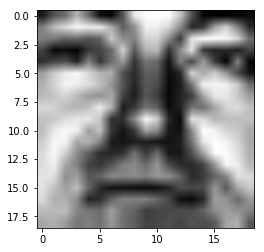

In [2]:
X = open('./svm.train.normgrey').readlines()
X = np.array([[float(yy) for yy in xx.split()[:-1]] for xx in X[2:] if xx.strip() != ""])
print (X.shape)
plt.imshow(X[100].reshape((19, 19)), cmap=cm.gray, interpolation="bilinear")

## 2. PCA

In [3]:
# Definition and parameter settings

n_comp = 49
X = np.transpose(X)

(d, N) = X.shape
q = n_comp

print ("d",  d)
print ("N", N)
print ("q", q)

d 361
N 6977
q 49


In [4]:
choose_which = "sgd"
# "compute_c", "svd", "sgd"

In [5]:
if choose_which == "compute_c":
    e_vec, S, V = linalg.svd(X)
    print ("X", X.shape)
    print ("e_vec", e_vec.shape)
    print ("S", S.shape) 
    print ("V", V.shape)
    
    #Sig = np.diag(S * S)
    #print (Sig.shape)
    #C = W * Sig * np.transpose(W)
    
elif choose_which == "svd":
    C = X @ np.transpose(X)
    e_val, e_vec = np.linalg.eig(C)
    e_vec = autograd.numpy.real( e_vec )
    
    print ("C", C.shape)
    print ("e_val", e_val.shape)
    print ("e_vec", e_vec.shape)
    
elif choose_which == "sgd":
    
    def print_diff(W):
        W2 = W @ np.transpose(W)
        dd = np.mean(np.identity(d) - W2)
        norm = np.mean(W2)
        print ("W     (Norm | Max | Min) : ({:.8f} | {:.8f} | {:.8f})".format(np.linalg.norm(W), np.max(W), np.min(W)))
        print ("WW^T (Diff | Norm) : ({:.8f}, {:.8f})".format(dd, norm) )
    
    def dist(W, X, d, q):
        W = W.reshape(d, q)
        dd = X - W @ autograd.numpy.transpose(W) @ X
        norm = autograd.numpy.linalg.norm( dd )
        return norm * norm
    
    maxiter = 1600
    e_vec = autograd.numpy.real( (autograd.numpy.random.rand(d,q) - 0.5) )
    print ('start optimising...')
    print_diff(e_vec)
    #trained_model = scipy.optimize.minimize(dist, e_vec, (X, d, q), method='CG', jac=grad(dist))
    trained_model = scipy.optimize.minimize(dist, e_vec, (X, d, q), method='CG', jac=grad(dist), options={'maxiter':maxiter})
    print ('optimisation finished')
    e_vec = trained_model.x.reshape(d,q)
    print_diff(e_vec)

start optimising...
W     (Norm | Max | Min) : (76.74553268 | 0.99996931 | -0.99994672)
WW^T (Diff | Norm) : (-0.05331301, 0.05608310)
optimisation finished
W     (Norm | Max | Min) : (7.00009480 | 0.20971185 | -0.19171383)
WW^T (Diff | Norm) : (0.00000024, 0.00276985)


In [6]:
top_e_vec = e_vec[:,:q]

X_transformed_pca = np.transpose(X) @ top_e_vec
X_transformed_pca.shape

(6977, 49)

In [7]:
loadings = np.transpose(top_e_vec)

In [8]:
loadings.shape

(49, 361)

## 3. Visualizing the components

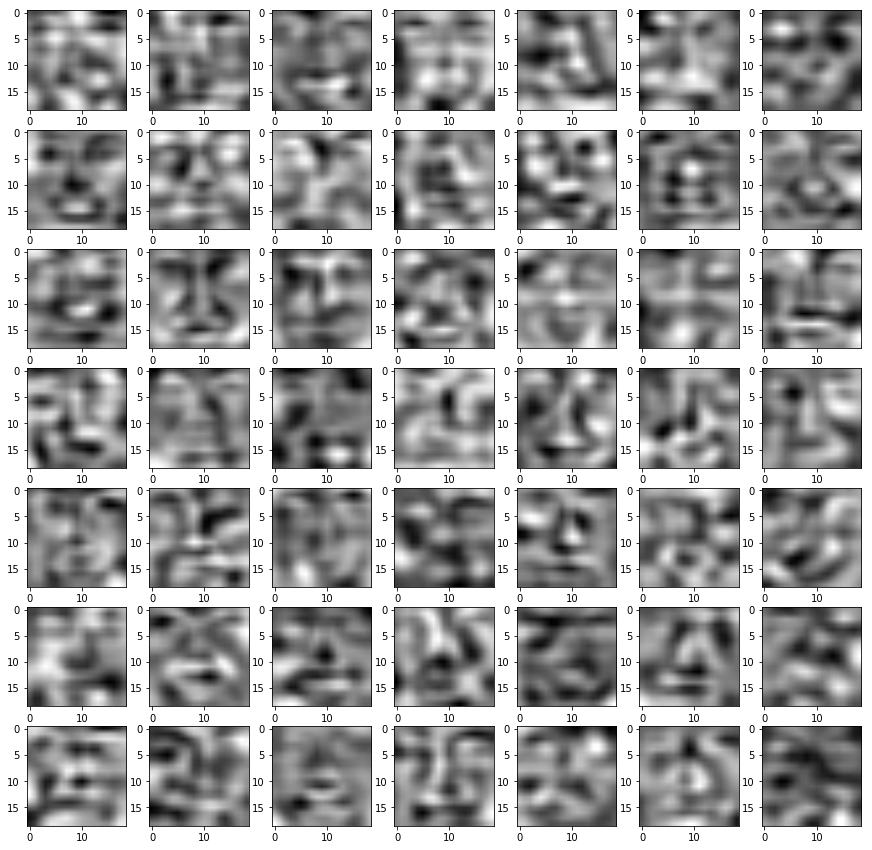

In [9]:
f, axarr = plt.subplots(int(np.sqrt(n_comp)), int(np.sqrt(n_comp)), figsize = (15, 15))

comp_ix = 0
for j in range(int(np.sqrt(n_comp))):
    for i in range(int(np.sqrt(n_comp))):
        axarr[i, j].imshow(loadings[comp_ix].reshape((19, 19)), cmap=cm.gray, interpolation="bilinear")
        comp_ix += 1

In [10]:
reconstruction_err = np.linalg.norm( X - top_e_vec @ np.transpose(X_transformed_pca) )
print ('Reconstructions error: ', reconstruction_err)

Reconstructions error:  166.92780929955836


## 4. Reconstructing an image

In [11]:
# Do you understand what's happening here?

X_sample_rec_nmf = np.dot(X_transformed_pca[50], loadings)

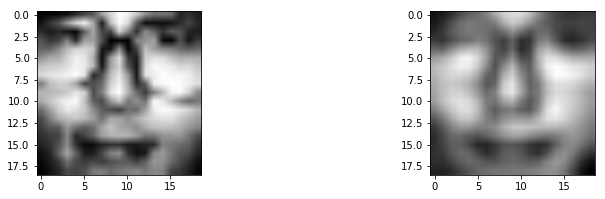

In [12]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(X[:,50].reshape((19, 19)), cmap=cm.gray, interpolation="bilinear")

plt.subplot(1, 3, 3)
plt.imshow(X_sample_rec_nmf.reshape((19, 19)), cmap=cm.gray, interpolation="bilinear")